# AQI Prediction using Random Forest

This notebook predicts AQI (Air Quality Index) using pollutants and weather features.

**Inputs:** PM2.5, PM10, CO, NO2, O3, Temperature, Humidity

**Output:** AQI value and AQI category


In [13]:
# Install required packages if needed (uncomment to run)
# !pip install pandas scikit-learn matplotlib seaborn joblib nbformat

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

%matplotlib inline
sns.set_style('whitegrid')
print('Libraries imported')

Libraries imported


In [9]:
# Load dataset
df = pd.read_csv('aqi_data.csv')
print('Rows, Columns:', df.shape)
df.head()

Rows, Columns: (10, 8)


,PM2.5,PM10,CO,NO2,O3,Temperature,Humidity,AQI
0,35,80,0.8,40,50,30,60,102
1,60,110,1.2,55,65,32,58,155
2,18,40,0.5,22,40,27,65,75
3,120,200,2.3,80,90,35,55,210
4,10,20,0.3,12,30,25,70,50


,count,mean,std,min,25%,50%,75%,max
PM2.5,10.0,53.80,35.007301,10.0,27.50,50.00,71.250,120.0
PM10,10.0,100.00,55.176485,20.0,65.00,95.00,132.500,200.0
CO,10.0,1.11,0.619049,0.3,0.65,1.05,1.425,2.3
NO2,10.0,48.40,24.726055,12.0,28.75,47.50,66.250,85.0
O3,10.0,61.00,22.583180,30.0,42.50,57.50,80.000,95.0
Temperature,10.0,30.50,3.171050,25.0,28.50,30.50,32.750,35.0
Humidity,10.0,60.60,5.378971,54.0,57.25,59.50,63.750,70.0
AQI,10.0,133.20,53.418266,50.0,93.00,137.50,173.750,210.0


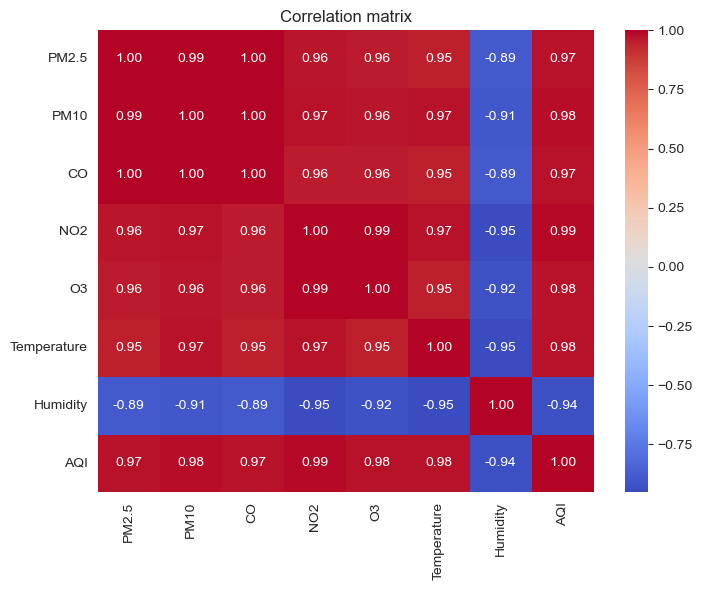

In [11]:
# Quick EDA: describe and correlation
display(df.describe().T)

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

In [15]:
# Prepare features and target
X = df[['PM2.5','PM10','CO','NO2','O3','Temperature','Humidity']]
y = df['AQI']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print('Train shape:', X_train.shape, 'Test shape:', X_test.shape)

Train shape: (8, 7) Test shape: (2, 7)


In [9]:
# Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print('Model trained. Train R2:', rf.score(X_train,y_train))

Model trained. Train R2: 0.9694490652497136


In [11]:
# Predict and evaluate
y_pred = rf.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f'RMSE: {rmse:.2f}')
print(f'MAE:  {mae:.2f}')
print(f'R²:   {r2:.2f}')

# Show comparison
comp = pd.DataFrame({'y_true': y_test.values, 'y_pred': np.round(y_pred,2)})
display(comp.reset_index(drop=True))

RMSE: 9.80
MAE:  9.79
R²:   0.76


,y_true,y_pred
0,195,184.77
1,155,145.65


In [13]:
# AQI category helper
def aqi_category(aqi):
    if aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Satisfactory'
    elif aqi <= 150:
        return 'Moderate'
    elif aqi <= 200:
        return 'Poor'
    elif aqi <= 300:
        return 'Very Poor'
    else:
        return 'Severe'

In [15]:
# Demo prediction on a sample
sample = pd.DataFrame({
    'PM2.5':[70],'PM10':[130],'CO':[1.4],'NO2':[65],'O3':[80],
    'Temperature':[33],'Humidity':[56]
})
pred = rf.predict(sample)[0]
print(f'Predicted AQI: {pred:.2f} --> Category: {aqi_category(pred)}')

Predicted AQI: 171.97 --> Category: Poor


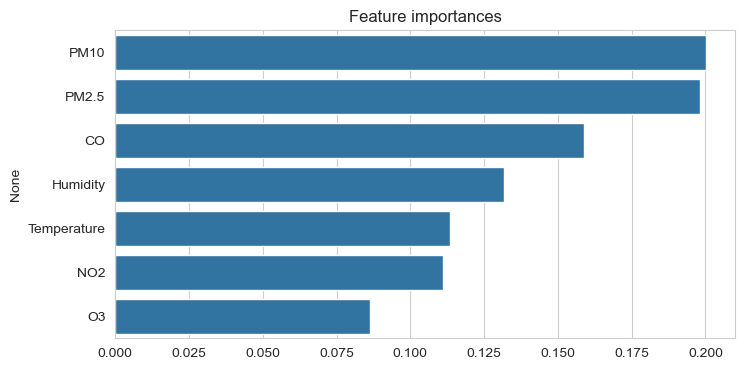

PM10           0.200148
PM2.5          0.198083
CO             0.159026
Humidity       0.131756
Temperature    0.113551
NO2            0.111119
O3             0.086318
dtype: float64

In [17]:
# Feature importances
feat_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,4))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title('Feature importances')
plt.show()
feat_imp

In [19]:
# Save trained model to disk
joblib.dump(rf, 'rf_aqi_model.joblib')
print('Saved model as rf_aqi_model.joblib')

Saved model as rf_aqi_model.joblib
